In [25]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [26]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [14, 6]})

Mean Reversion - (Pairs Trading)

Long Pair: Long stock A and short stock B
Short Pair: Short stock A and long stock B

You want to find a high correlation between stock A and B's price (usually > 0.8) -- in this case let's say 0.9. If you find a relationship suggesting that the prices move in opposite directions, you can capitalize on this behavior. ONCE the assets deviate from their typical correlation, say 0.5, you can long/short the pair since you expect the correlation to converge back to its original form.
Sort of becomes an art when you try to maximize the spread between the assets

In [28]:
#Strategy

#Find 2 assets that move similarly with eachother (whether it be a negative or positive correlation) Sell the 'overvalued' stock and buy the 'undervalued' stock
#A common signal to use to triger the purchase of a pair trade is to use the Price Ratio (Stock A / Stock B).
#If the ratio changes significantly, then you know it is time to trade. 'Significance' can be measured with standard deviation.

In [29]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

C:\Users\aaron\AppData\Local\Temp\ipykernel_12352\3581673887.py:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [30]:
start_date = "2019-10-17" 
end_date = "2023-10-17"
symbols = ['NVDA', 'META', 'TSLA', 'AMZN', 'GOOG', 'AAPL', 'AMD', 'ADBE', 'MSFT', 'NFLX']
stocks_df = yf.download(symbols, start = start_date, end = end_date)['Adj Close']
stocks_df.head().dropna()

[                       0%                       ]

[*********************100%***********************]  10 of 10 completed


AAPL        ADBE        AMD       AMZN       GOOG  \
Date                                                                 
2019-10-17  57.208069  269.239990  31.139999  89.374001  62.653500   
2019-10-18  57.482830  265.519989  30.969999  87.875504  62.274502   
2019-10-21  58.479740  266.839996  32.029999  89.282997  62.307499   
2019-10-22  58.346004  261.089996  31.510000  88.286499  62.139999   
2019-10-23  59.128952  261.320007  31.360001  88.108498  62.956501   

                  META        MSFT        NFLX       NVDA       TSLA  
Date                                                                  
2019-10-17  190.389999  134.426392  293.350006  48.352009  17.464666  
2019-10-18  185.850006  132.232269  275.299988  47.406326  17.129999  
2019-10-21  189.759995  133.213837  278.049988  48.780060  16.900000  
2019-10-22  182.339996  131.231476  266.690002  48.680515  17.038668  
2019-10-23  186.149994  132.068695  271.269989  48.551105  16.978666

In [31]:
stocks_df.tail()

AAPL        ADBE         AMD        AMZN        GOOG  \
Date                                                                     
2023-10-10  178.389999  532.719971  109.010002  129.479996  139.199997   
2023-10-11  179.800003  549.909973  108.309998  131.830002  141.699997   
2023-10-12  180.710007  559.630005  108.790001  132.330002  140.289993   
2023-10-13  178.850006  548.760010  105.089996  129.789993  138.580002   
2023-10-16  178.720001  550.739990  106.459999  132.550003  140.490005   

                  META        MSFT        NFLX        NVDA        TSLA  
Date                                                                    
2023-10-10  321.839996  328.390015  373.320007  457.980011  263.619995  
2023-10-11  327.820007  332.420013  365.929993  468.059998  262.989990  
2023-10-12  324.160004  331.160004  361.200012  469.450012  258.869995  
2023-10-13  314.690002  327.730011  355.679993  454.609985  251.119995  
2023-10-16  321.149994  332.640015  360.820007  460.950012  253.919998

In [32]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [33]:
stocks_df.iplot()

In [34]:
fig_price=px.line(stocks_df, title='Price of individual Stocks')
fig_price.show()

In [35]:
corr_matrix = stocks_df.corr()
corr_matrix

AAPL      ADBE       AMD      AMZN      GOOG      META      MSFT  \
AAPL  1.000000  0.441178  0.826053  0.299426  0.838457  0.255284  0.949389   
ADBE  0.441178  1.000000  0.737592  0.858294  0.706781  0.896043  0.602092   
AMD   0.826053  0.737592  1.000000  0.591216  0.868022  0.565047  0.892791   
AMZN  0.299426  0.858294  0.591216  1.000000  0.532779  0.789108  0.392721   
GOOG  0.838457  0.706781  0.868022  0.532779  1.000000  0.541340  0.920794   
META  0.255284  0.896043  0.565047  0.789108  0.541340  1.000000  0.434732   
MSFT  0.949389  0.602092  0.892791  0.392721  0.920794  0.434732  1.000000   
NFLX  0.025753  0.782902  0.414805  0.777687  0.278572  0.818386  0.195359   
NVDA  0.847511  0.486934  0.765533  0.208854  0.742943  0.408030  0.898129   
TSLA  0.851111  0.588134  0.859759  0.555380  0.872566  0.361253  0.839995   

          NFLX      NVDA      TSLA  
AAPL  0.025753  0.847511  0.851111  
ADBE  0.782902  0.486934  0.588134  
AMD   0.414805  0.765533  0.859759  
AMZN  0.777687  0.208854  0.555380  
GOOG  0.278572  0.742943  0.872566  
META  0.818386  0.408030  0.361253  
MSFT  0.195359  0.898129  0.839995  
NFLX  1.000000  0.148718  0.217693  
NVDA  0.148718  1.000000  0.623802  
TSLA  0.217693  0.623802  1.000000

<Axes: >

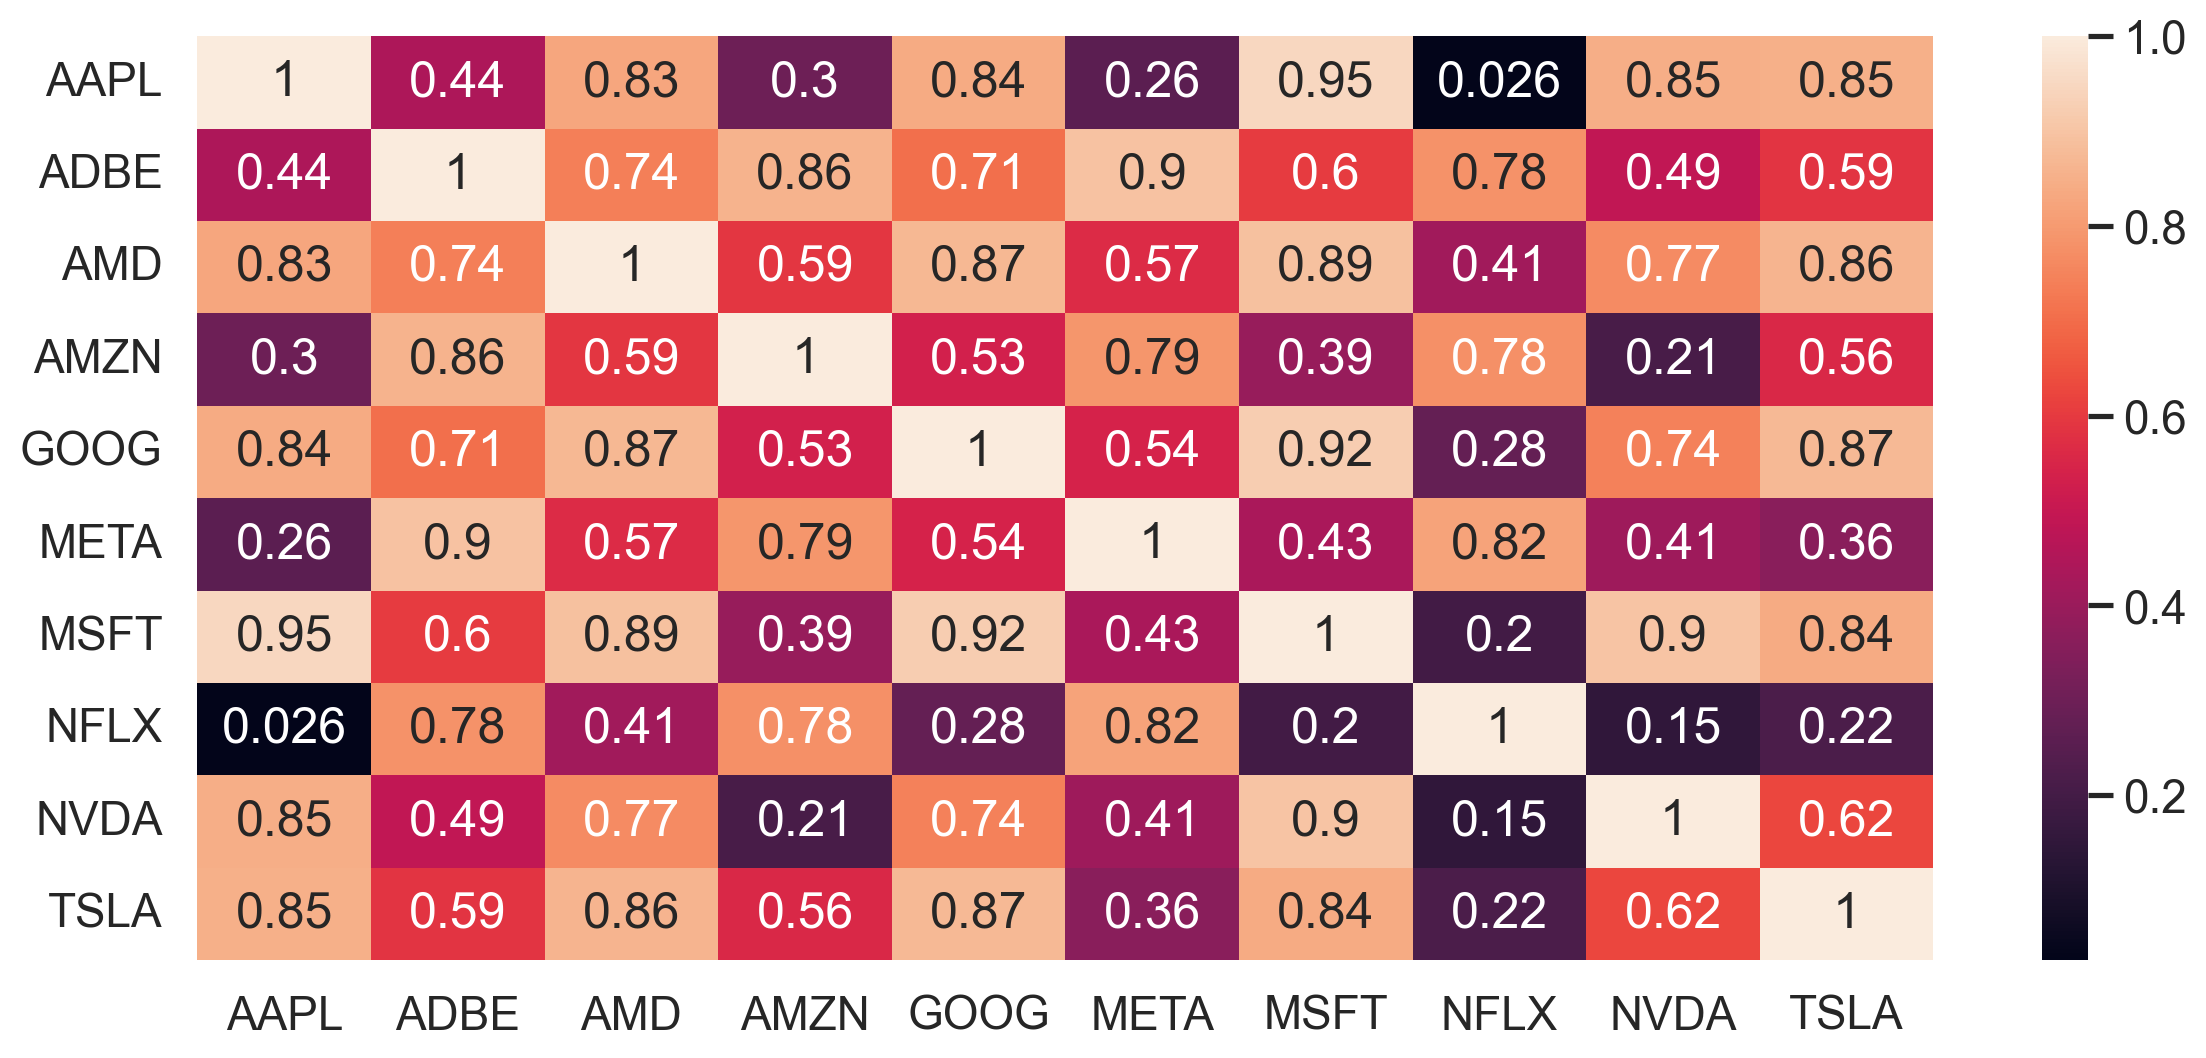

In [36]:
import seaborn as sn
from matplotlib.pyplot import figure

sn.heatmap(corr_matrix, annot = True)

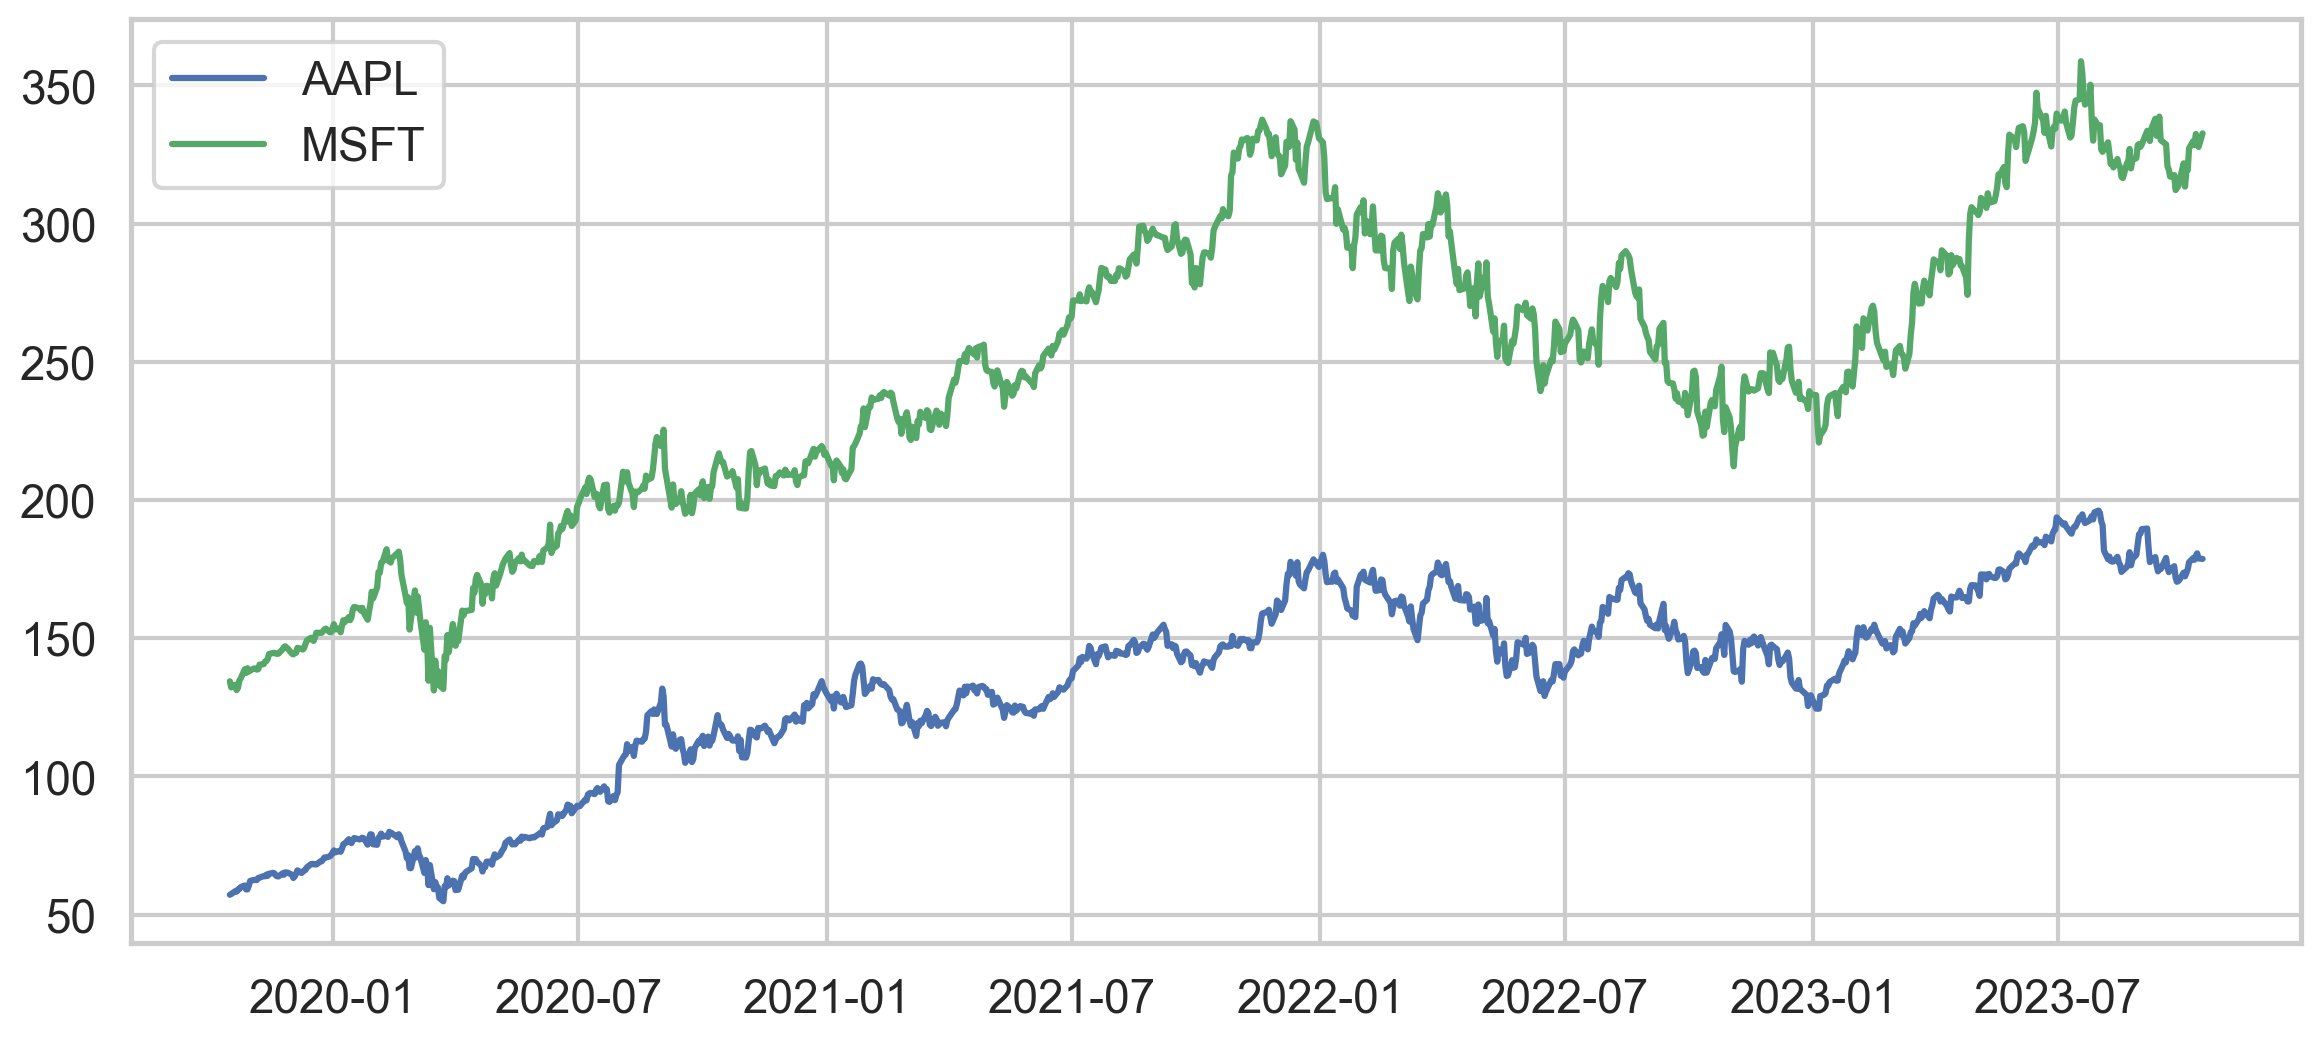

In [37]:
import matplotlib.pyplot as plt

AAPL = stocks_df['AAPL'] 
MSFT = stocks_df['MSFT']

# HOWEVER, let's check out the relationship between the stocks...

plt.plot(AAPL, label = "AAPL")
plt.plot(MSFT, label = "MSFT")
plt.legend()
# oh... that's why the correlation seem very high. The data are not 'standardized.'
# Let's look at a different one...

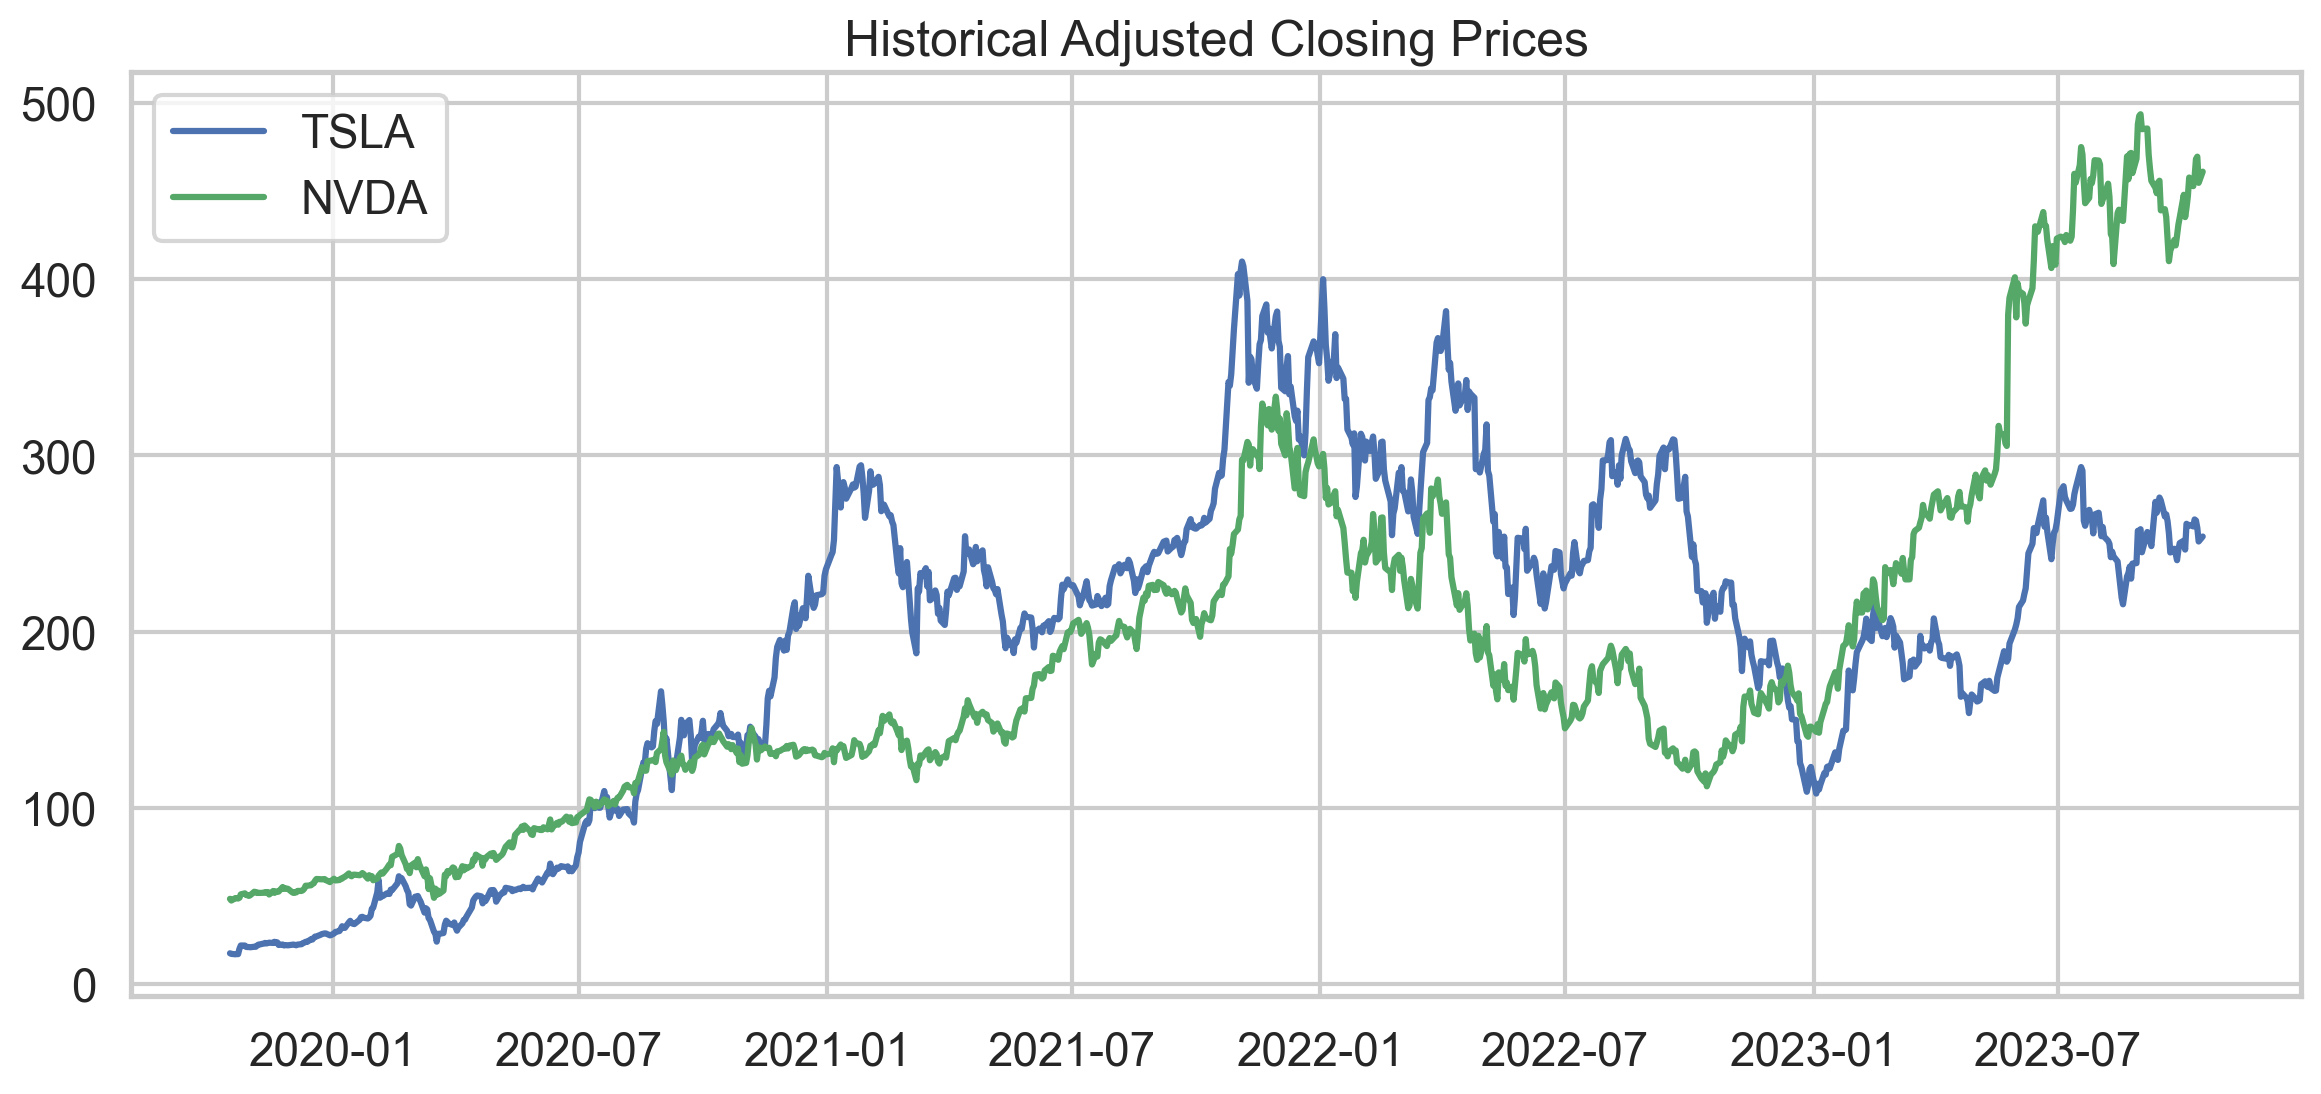

In [38]:
TSLA = stocks_df['TSLA']
NVDA = stocks_df['NVDA']
plt.plot(TSLA, label = "TSLA")
plt.plot(NVDA, label = "NVDA")
plt.title('Historical Adjusted Closing Prices')
plt.legend()

Text(0.5, 1.0, 'Spread between TSLA and NVDA')

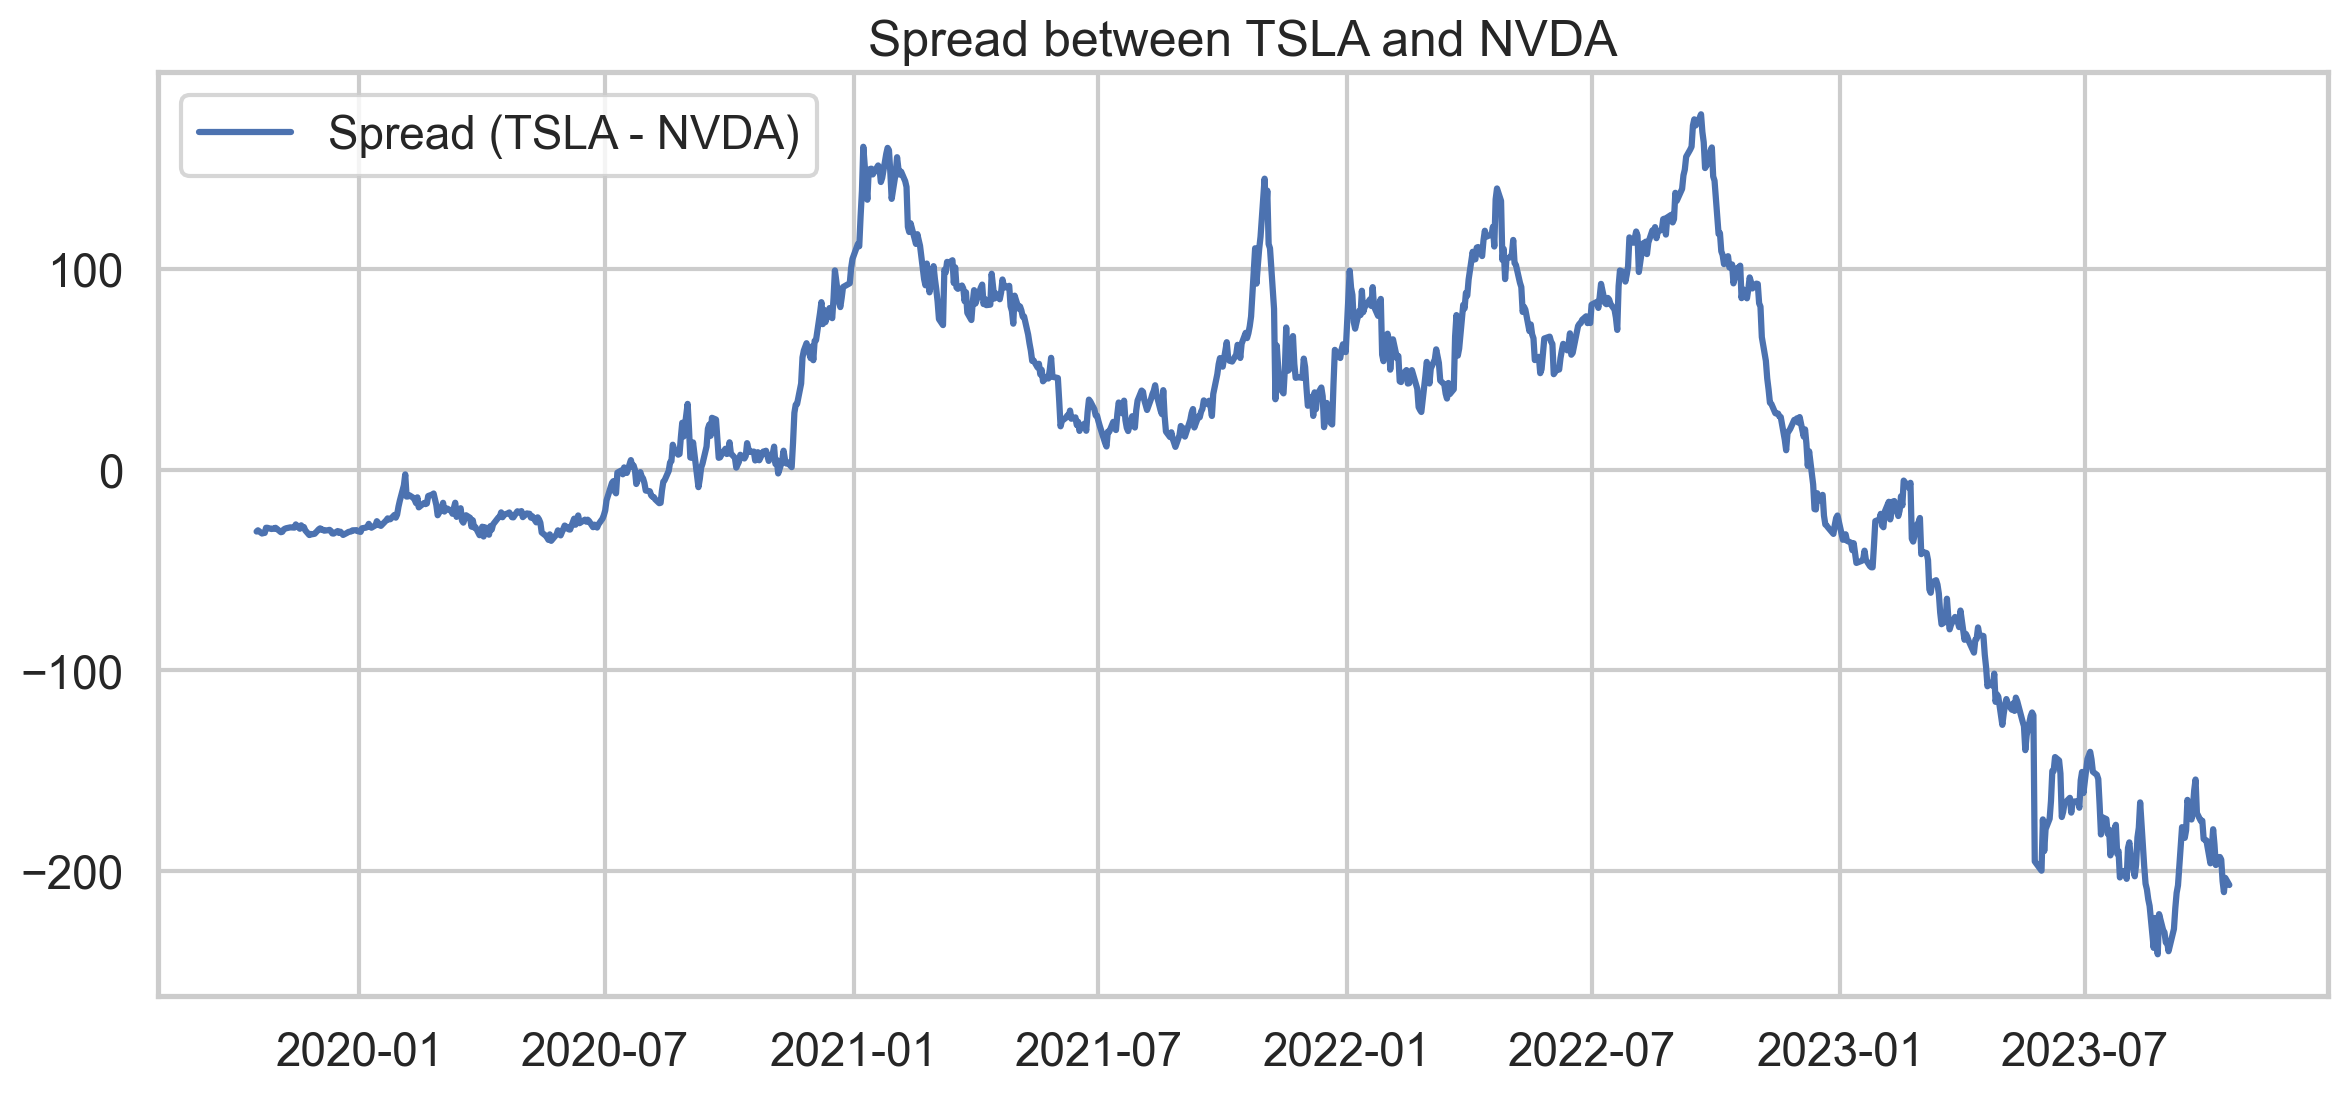

In [39]:
# plot the spread

plt.plot(TSLA - NVDA, label = 'Spread (TSLA - NVDA)')
plt.legend()
plt.title("Spread between TSLA and NVDA")

In [40]:
# Check out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(TSLA, NVDA)

In [41]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.7182906294515407


In [42]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for TSLA and NVDA
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
# ADF for Berkshire Hathaway Class B
TSLA_ADF = adfuller(TSLA)
print('P value for the Augmented Dickey-Fuller Test is', TSLA_ADF[1])
NVDA_ADF = adfuller(NVDA)
print('P value for the Augmented Dickey-Fuller Test is', NVDA_ADF[1])
Spread_ADF = adfuller(TSLA - NVDA)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(TSLA / NVDA)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of TSLA and NVDA

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.23301662097404713
P value for the Augmented Dickey-Fuller Test is 0.9674638342254126
P value for the Augmented Dickey-Fuller Test is 0.9301251260169028
P value for the Augmented Dickey-Fuller Test is 0.28146230660105365


Text(0.5, 1.0, 'Price Ratio between TSLA and NVDA')

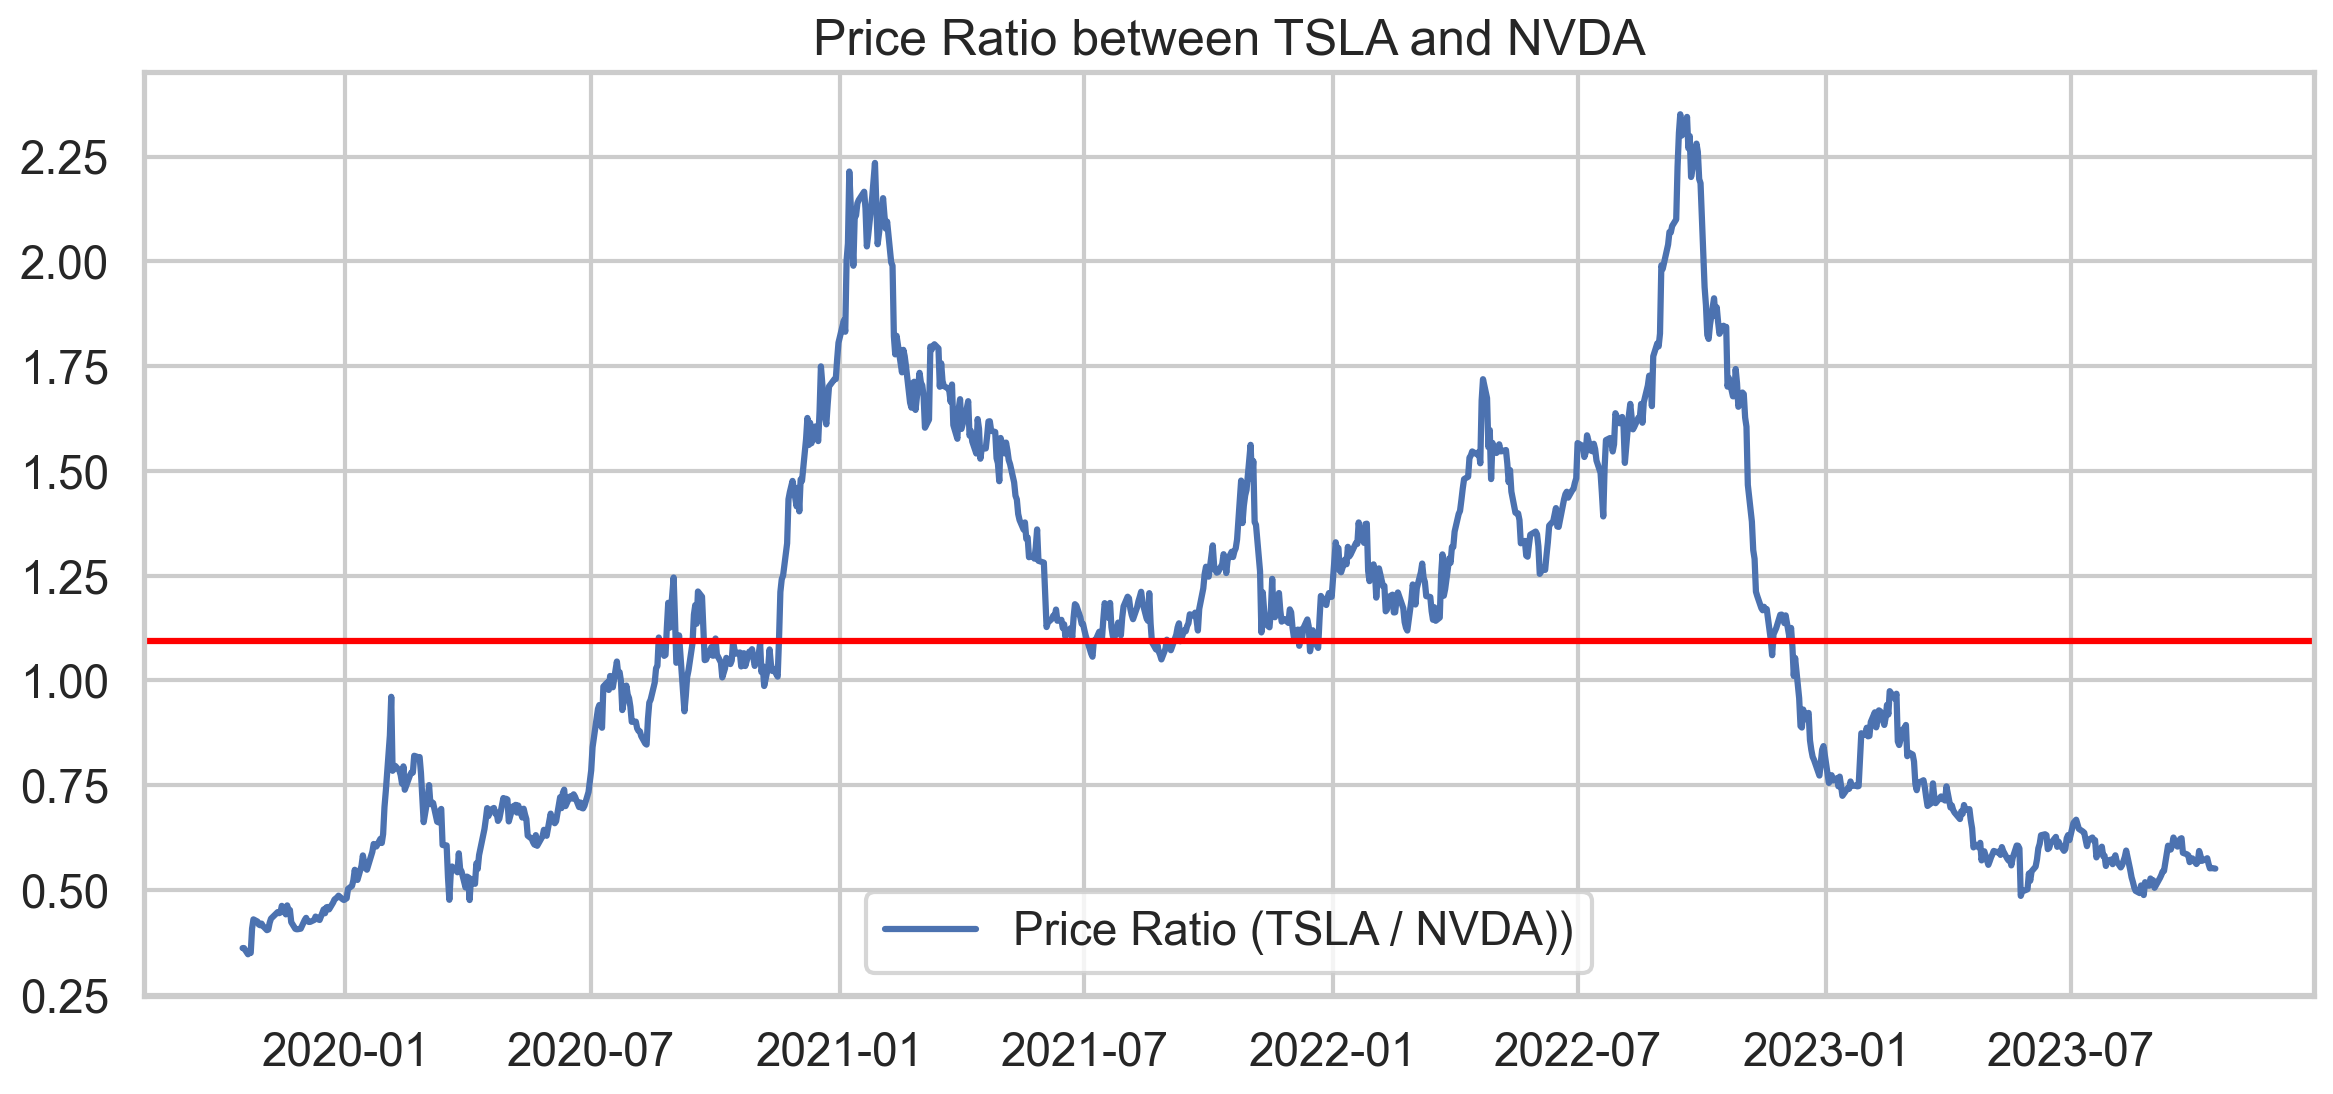

In [43]:
# Also, we can take a look at the price ratios between the two time series.

ratio = TSLA / NVDA
plt.plot(ratio, label = 'Price Ratio (TSLA / NVDA))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between TSLA and NVDA")

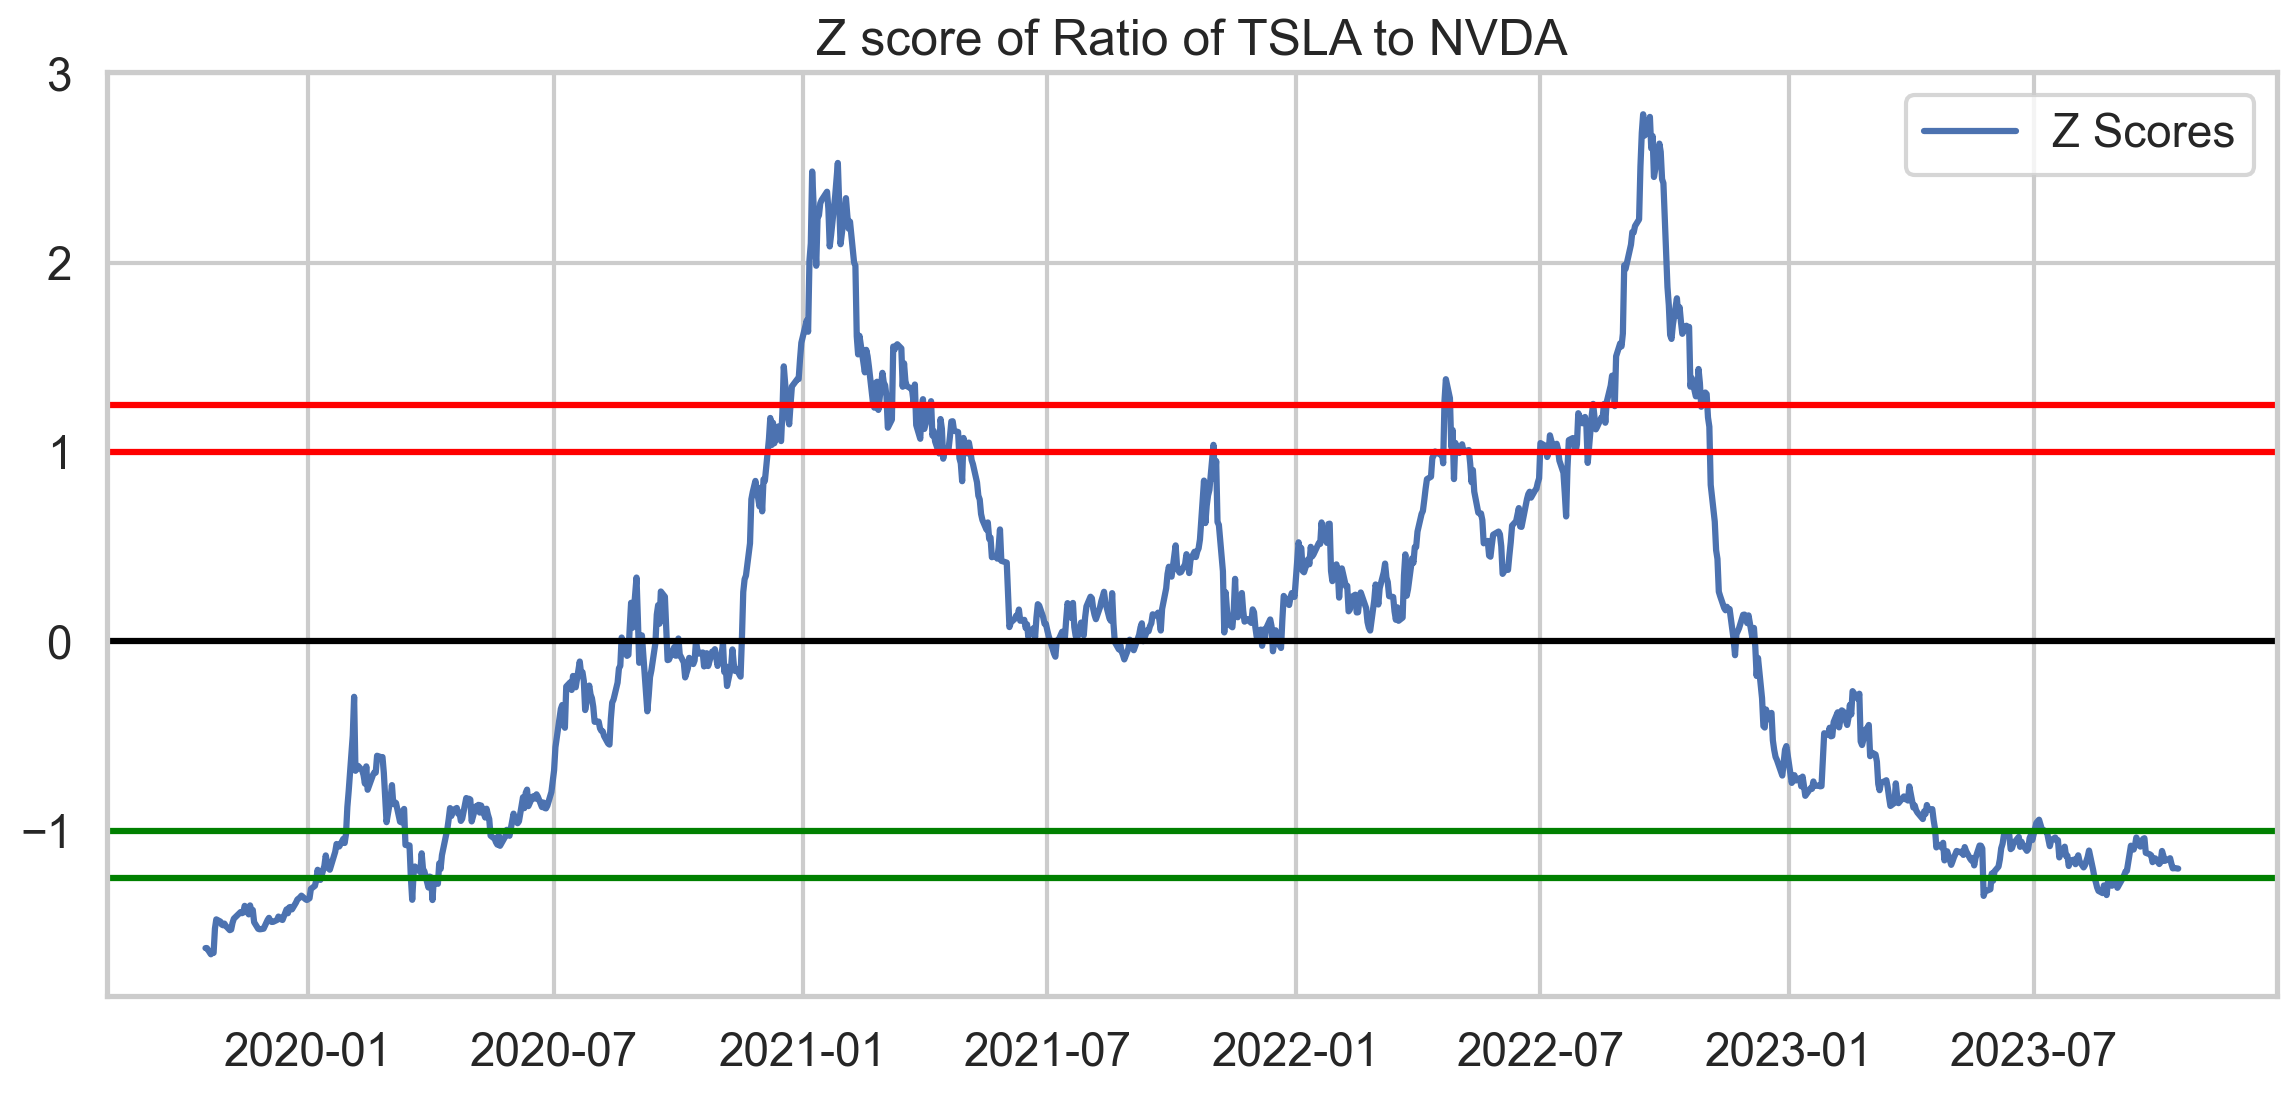

In [44]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.

# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of TSLA to NVDA')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (TSLA to NVDA).

In [45]:
# That's cool.. so when do we actually start trading? We need some form of 'signal' to trade (and to trade)
# This is where it can become an 'artform' AND a probability game.
# You could split 80 / 20 for train and test, BUT we are not going to be backtesting since we are just going over the model.
# train = ratio[0:round(0.8*len(ratio))]
# test = ratio[round(0.8*len(ratio)):]
# print('Do the splits check out?',len(train) + len(test) == len(ratio))

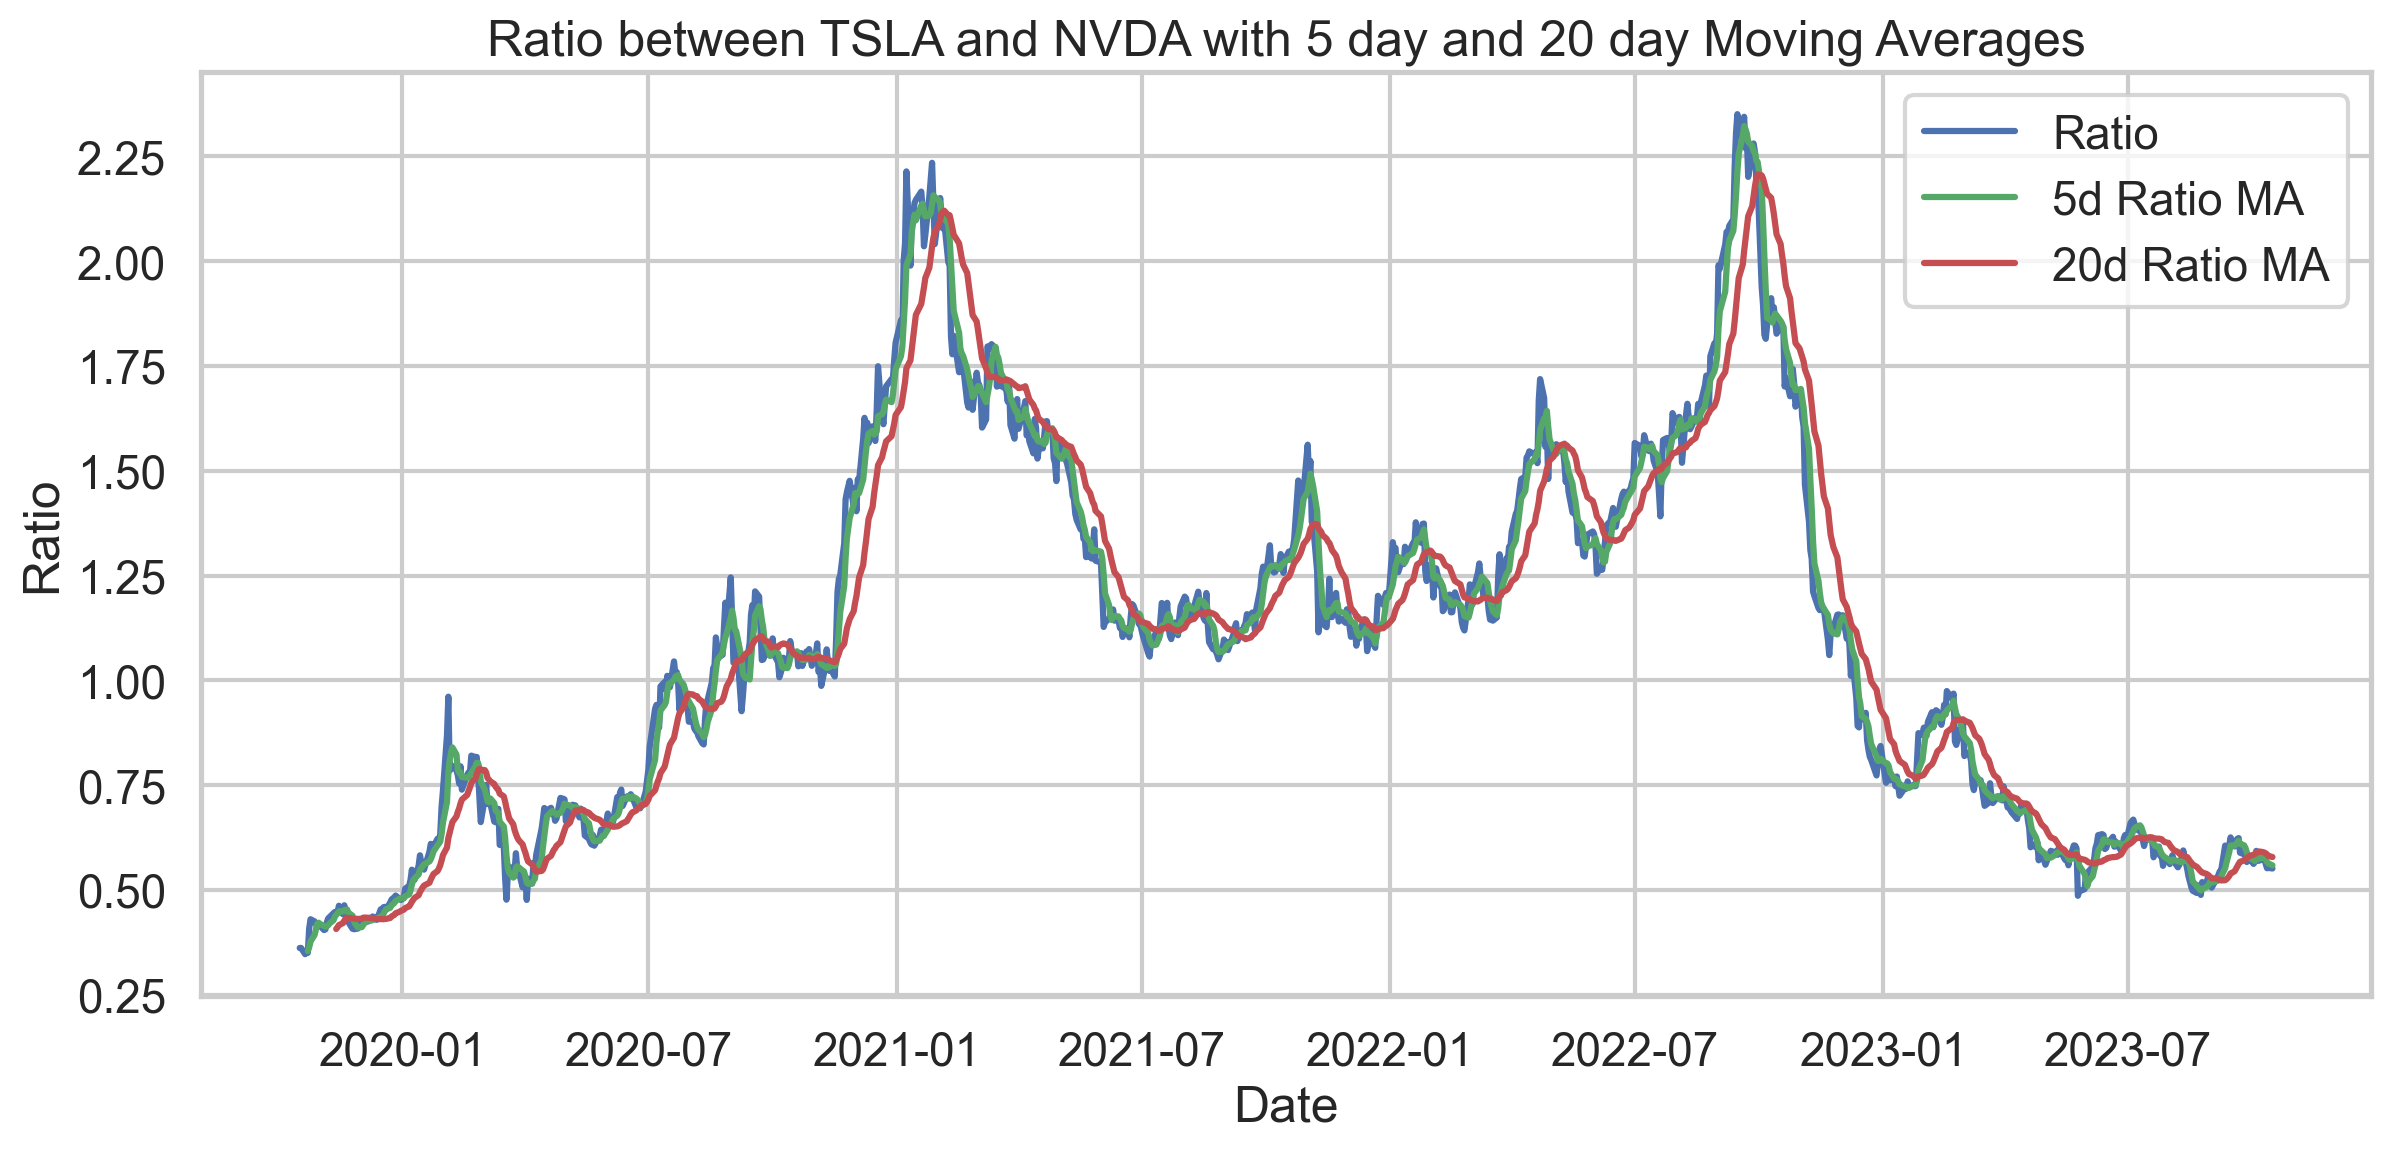

In [46]:
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between TSLA and NVDA with 5 day and 20 day Moving Averages')
plt.show()

SIMPLE STRATEGY

1. GO LONG THE SPREAD WHENEVER THE Z-SCORE IS BELOW -1.0 and -1.25
2. GO SHORT THE SPREAD WHEN THE Z-SCORE IS ABOVE 1.0 and 1.25
3. EXIT POSITION WHEN THE Z-SCORE APPROACHES 0.

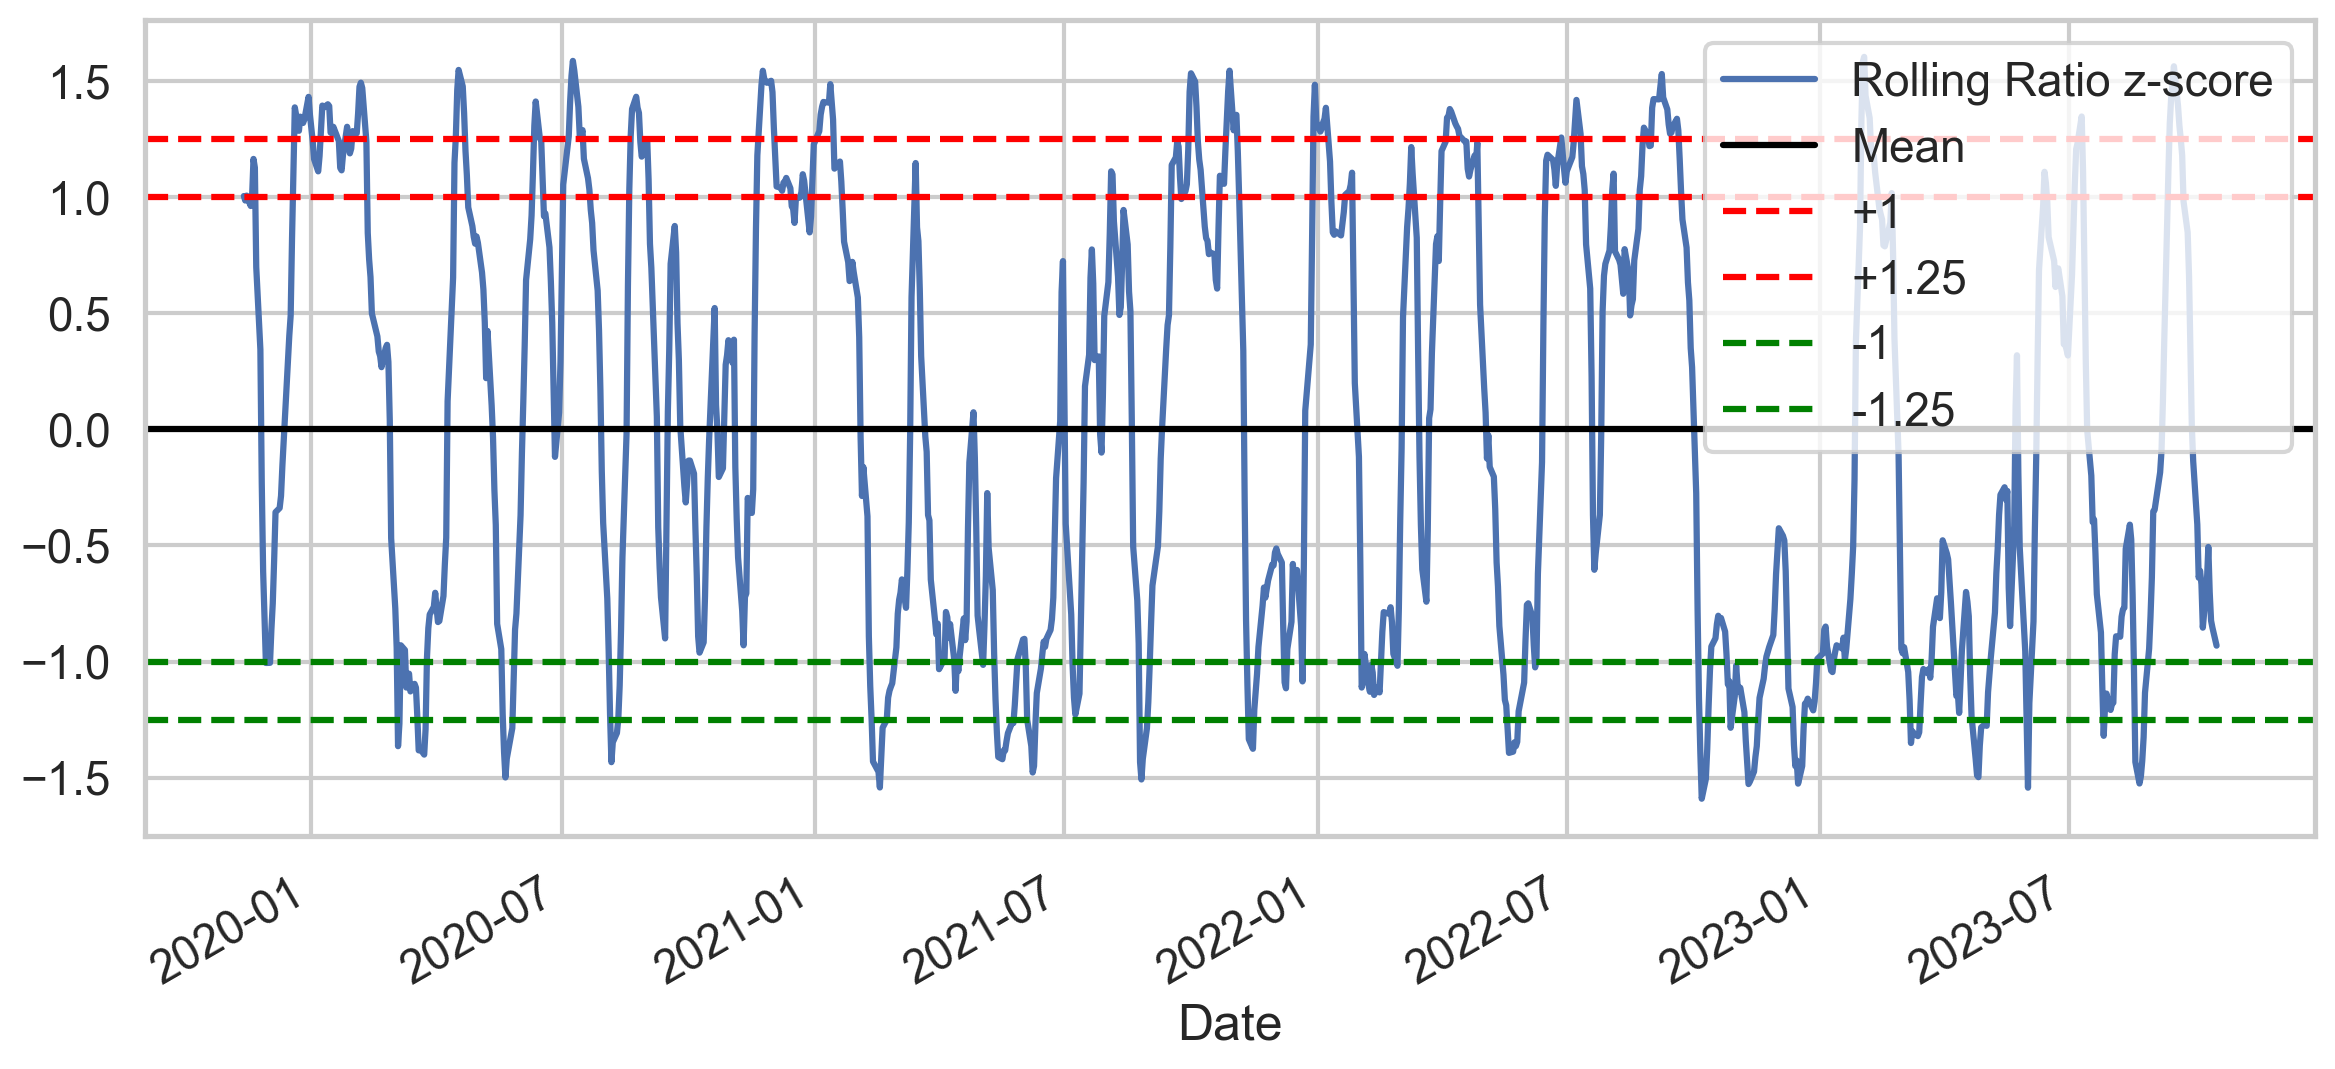

In [47]:
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

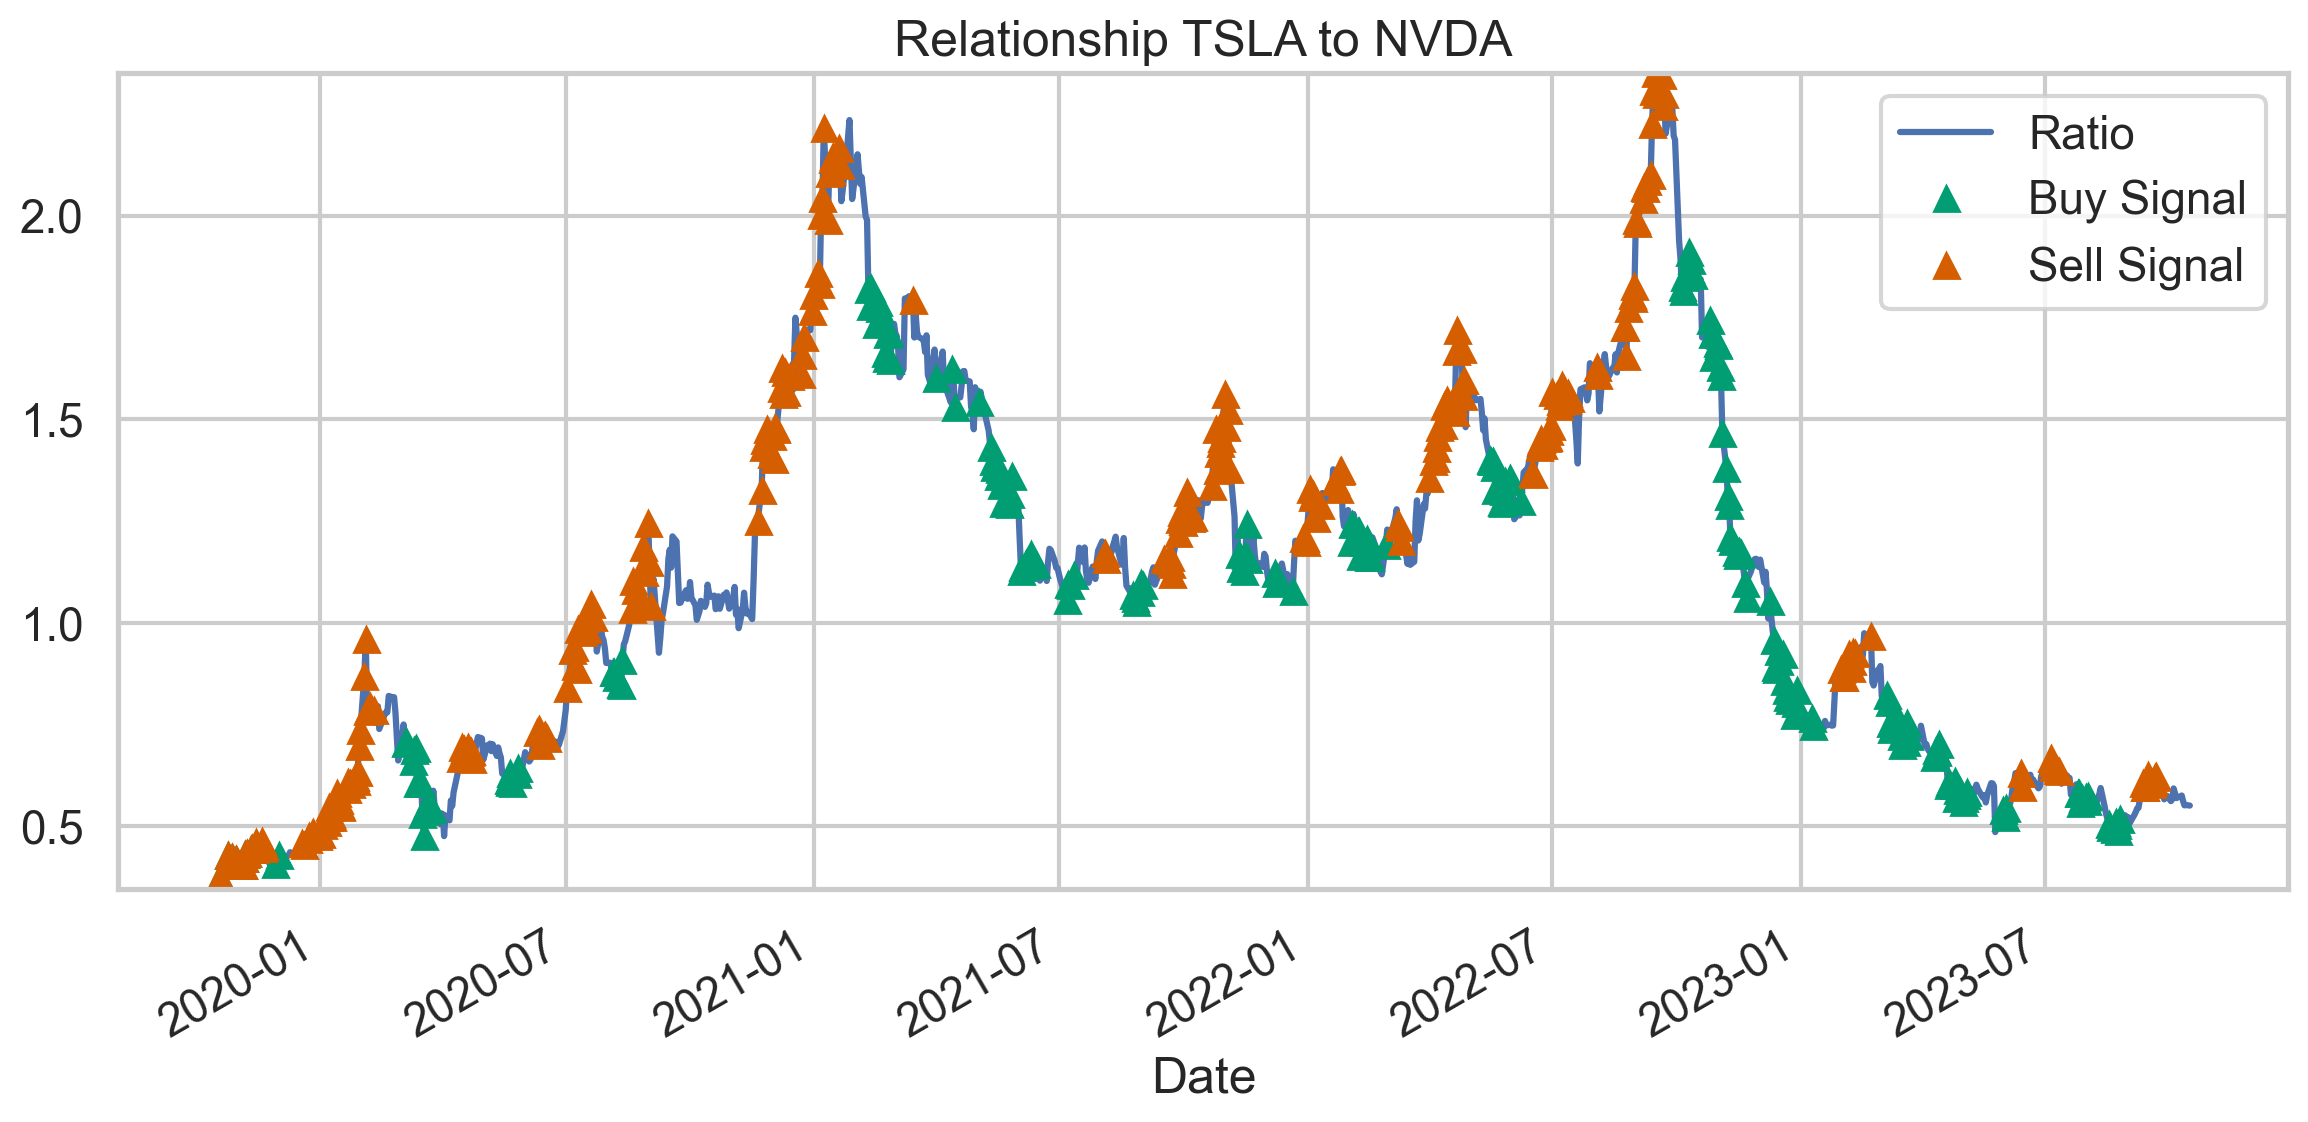

In [48]:
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship TSLA to NVDA')
plt.show()